## UCLA Cross Validation Results Evaluation

In [1]:
import sys
sys.path.append("../")
sys.path.append("../../venv/lib/python3.6/site-packages/")

In [2]:
import os
import pandas as pd
from lib import analysis_utils as au
import matplotlib.pyplot as plt
import scipy
import numpy as np

/home/jesper/tmp/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load the data

In [3]:
pred_dir = "models_preds"
# base_name = "UCLA_results_validation_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split"
base_name = "test_datalen-40720_epochs-1_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split"
folds = []

for filename in os.listdir(pred_dir):
    if filename.startswith(base_name):
        print("loading ", filename)
        folds.append(pd.read_csv(os.path.join(pred_dir, filename)))
        
print ("loaded ", len(folds), " folds")

loading  test_datalen-40720_epochs-1_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-2.csv
loading  test_datalen-40720_epochs-1_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-4.csv
loading  test_datalen-40720_epochs-1_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-1.csv
loading  test_datalen-40720_epochs-1_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-0.csv
loading  test_datalen-40720_epochs-1_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-3.csv
loaded  5  folds


In [4]:
folds[0]

,imageHASH,name,violence,protest,sign,photo,fire,police,children,group_20,...,pred_sign,pred_photo,pred_fire,pred_police,pred_children,pred_group_20,pred_group_100,pred_flag,pred_night,pred_shouting
0,b6b9984011c0c0d0,train-17156.jpg,0.455492,True,1,0,0,1,0,1,...,0.961194,3.221234e-04,2.815740e-02,2.425459e-02,0.216010,0.261496,1.435680e-03,1.910318e-04,1.994530e-02,3.329615e-04
1,d5d6123331cef860,train-17918.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.999970,2.850271e-09,9.152805e-04,4.201611e-05,0.404408,0.106607,3.447392e-10,1.441054e-09,1.247202e-04,4.515920e-10
2,8222252b1f4b47c7,train-01370.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.961970,5.180731e-05,1.844629e-02,6.509072e-03,0.233999,0.142115,1.913404e-04,4.407875e-05,1.834326e-02,1.145027e-04
3,e5e5ccf8f4e4e4f8,train-21326.jpg,0.314813,True,1,1,0,0,0,1,...,0.951713,9.844238e-04,4.149271e-02,4.289612e-02,0.323610,0.337539,3.803123e-04,8.308154e-04,2.925099e-02,2.517925e-04
4,32e4ec6ce4b4cbe4,train-07484.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.810212,4.617556e-03,7.154202e-02,1.021810e-01,0.333822,0.264047,4.158465e-02,3.820070e-03,9.383733e-02,8.202041e-03
5,495933777571e1d8,train-23678.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.939069,2.452593e-04,1.772446e-02,2.756814e-02,0.230157,0.129199,7.599164e-03,1.985714e-04,4.252709e-02,6.018873e-04
6,bc6e64e4e5e56f46,test-01077.jpg,0.171874,True,1,0,0,0,0,0,...,0.998967,1.235822e-07,2.471575e-03,1.723364e-04,0.153695,0.073262,7.354423e-08,3.348757e-08,6.952205e-04,1.983264e-07
7,f9edade7c6c6ce2f,train-04978.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,1.000000,1.053628e-14,1.217752e-05,7.485864e-10,0.177926,0.021607,1.259809e-16,7.687533e-16,9.279252e-08,2.218335e-15
8,405233a2960a5376,train-20743.jpg,0.327007,True,1,0,0,0,0,1,...,0.986750,1.149133e-05,9.556836e-03,8.261580e-04,0.302663,0.186807,7.219446e-06,5.575367e-06,4.305968e-03,8.412380e-06
9,d10733372f2727f8,train-28094.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,1.000000,3.364817e-33,7.124091e-11,3.956005e-19,0.000025,0.002970,3.578220e-35,3.983500e-36,9.957800e-13,1.248457e-30


### Protest

printing fold  0


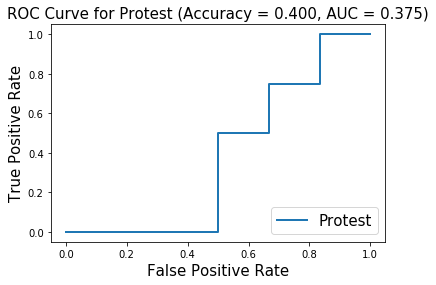

printing fold  1


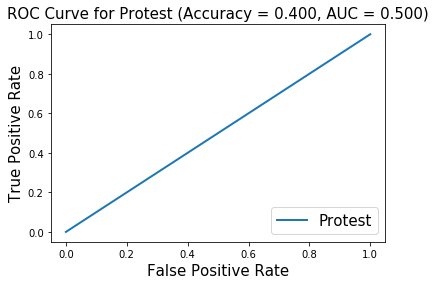

printing fold  2


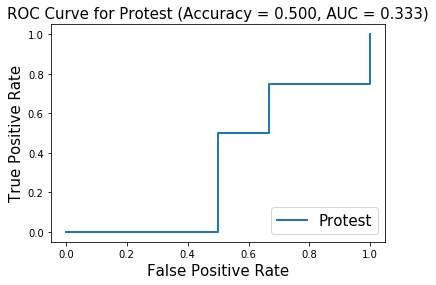

printing fold  3


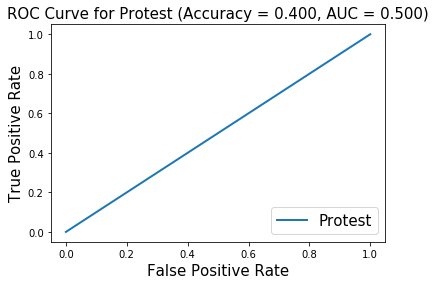

printing fold  4


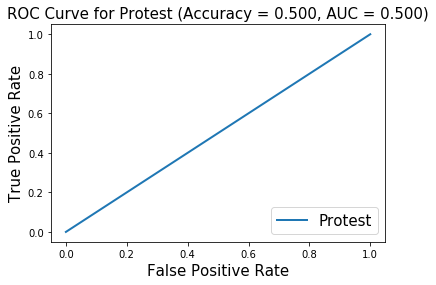

In [5]:
for indx, fold in enumerate(folds):
    print("printing fold " , indx)
    au.plotROC("protest", fold["protest"], fold["pred_protest"])

### Violence

/home/jesper/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


the rsquare measure has a mean of  0.014656529879707347  and standard deviation of  0.017997266004448766
the correlation measure has a mean of  nan  and standard deviation of  nan


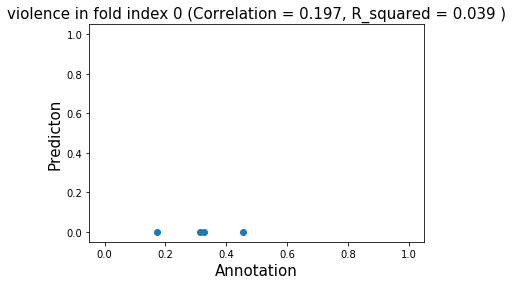

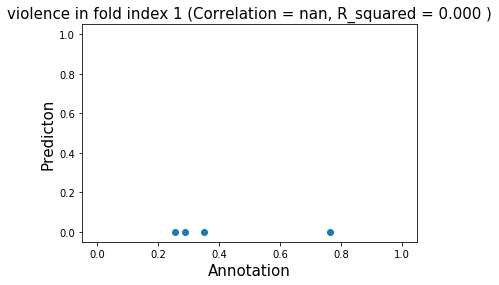

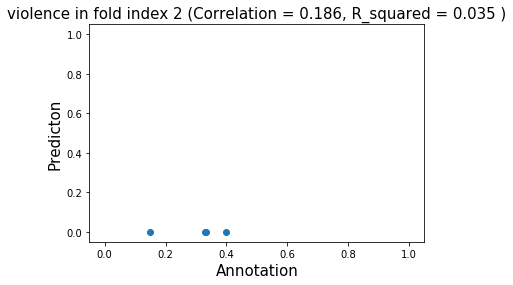

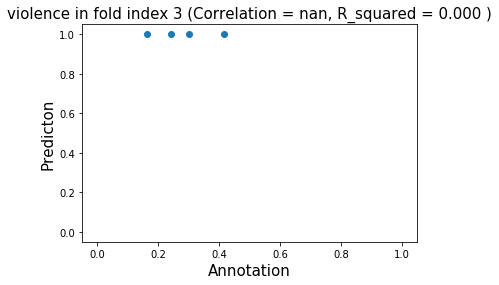

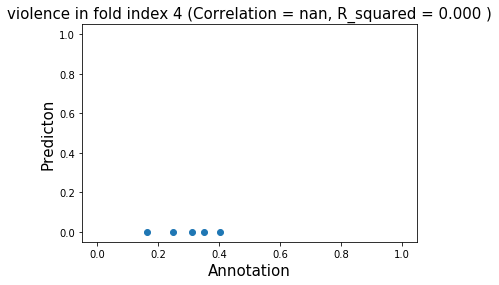

In [6]:
r_squared_all_folds = []
corr_all_folds = []

for indx, fold in enumerate(folds):
    # remove masked values from test set
    non_masked_violence_true = fold[fold["violence"] != - 1]["violence"]
    non_masked_violence_preds = fold[fold["violence"] != - 1]["pred_violence"]
    
    fig, ax = plt.subplots()
    plt.scatter(non_masked_violence_true, non_masked_violence_preds, label = "violence")
    plt.xlim([-.05,1.05])
    plt.ylim([-.05,1.05])
    plt.xlabel('Annotation', fontsize = 15)
    plt.ylabel('Predicton', fontsize = 15)
    corr, pval = scipy.stats.pearsonr(non_masked_violence_true, non_masked_violence_preds)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(non_masked_violence_true,non_masked_violence_preds)
    r_squared = r_value ** 2
    r_squared_all_folds.append(r_squared)
    corr_all_folds.append(corr)
    plt.title(('{attr} in fold index {fold} (Correlation = {corr:.3f}, R_squared = {r_2:.3f} )'
                .format(attr = "violence", corr= corr, r_2 = r_squared, fold = indx  )), fontsize = 15)
    
std_rsquare = np.std(np.array(r_squared_all_folds))
mean_rsquare = np.mean(np.array(r_squared_all_folds))

std_corr = np.std(np.array(corr_all_folds))
mean_corr = np.mean(np.array(corr_all_folds))

print("the rsquare measure has a mean of ", mean_rsquare, " and standard deviation of ", std_rsquare)
print("the correlation measure has a mean of ", mean_corr, " and standard deviation of ", std_corr)